## <div style="text-align: center">Análisis de factores que influyen en el rendimiento escolar<br/><br/> </div> <div style="text-align: center"> Patricia Pérez Felibert 👩‍💻 </div>

## __Aspectos Preliminares:__
* __Problema a estudiar:__ Desarrollar un modelo donde podamos identificar los factores que influyen en el desempeño académico de los alumnos de una escuela Portuguesa, nos enfocaremos en aquellos que presentan un bajo desempeño y esto será medido en el promedio final del año escolar. Nos apoyaremos en un archivo con registros sociodemográficos y conductuales de los alumnos de dos escuelas para perfilar a los estudiantes.

* __Tipo de modelo:__ Realizaremos un modelo de predicción de regresión lineal, donde buscaremos identificar a los individuos con bajo promedio escolar. Se decide realizar este tipo de modelo ya que el vector objetivo representa un rango de notas obtenidas por los estudiantes durante el año escolar, por lo que nos apoyaremos en un modelo de regresión lineal para desarrrollar el análisis.

* __Métricas a estudiar:__ Evaluaremos las métricas r2 y mse, las cuales nos proveen información importante sobre el desempeño del modelo y de esta manera comprender si el modelo esta capturando la mayor variabilidad de los datos.

## __Aspectos computacionales:__
* __Librerías a utilizar:__ 
    * __Ingesta:__ Pandas y numpy.
    * __Preprocesamiento:__ Pandas, numpy y distintas funciones del modulo preprocessing de la librería sklearn, por ejemplo StandarScaler para estandarizar los datos.
    * __Visualización:__ Seaborn, missingno y matplotlib.
    * __Modelación:__ 
        * Función LinearRegression, del módulo linear_model , librería sklearn
    * __Métricas de evaluación:__ 
        * mean_squared_error , r2_score podemos obtenerlas del módulo metrics en la librería sklearn, estas métricas nos proveen información importante sobre el desempeño del modelo y de esta manera comprender si el modelo esta capturando la mayor variabilidad de los datos
    
* __Preprocesamiento:__ Iniciaremos con una inspección del set de datos, identificando la cantidad de columnas y tipos de variables en cada una. Posteriormente evaluaremos si hay presencia de datos nulos o mal ingresados, los cuales eliminaremos para no afectar el modelo.

* __Recodificación:__ Una vez que el set se encuentra libre de datos nulos, realizaremos una recodificación de las columnas que poseen registros de tipo texto, transformándolos a valores discretos según su categoría. Éste proceso es importante ya que los modelos no son capaces de interpretar variables de tipo texto.

__Descripción de la base de datos:__ Se debe utilizar el archivo students.csv. Las variables que componen la base son:
* `school`: Escuela del estudiante. (binaria: 'GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira).

* `sex`: Sexo del estudiante. (binaria: 'F' - Mujer o 'M' - Hombre).
* `age`: Edad del estudiante. (numérica: de 15 a 22).
* `address`: Ubicación de la casa del estudiante. (binaria: 'U' - urbana o 'R' - rural).
* `famsize`: Tamaño de la familia. (binaria: 'LE3' - less or equal to 3 or 'GT3' - greater than 3).
* `Pstatus`: Estado cohabitacional de los padres. (binaria: 'T' - cohabitando juntos o 'A' - viviendo separados).
* `Medu`: Nivel educacional de la madre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
* `Fedu`: Nivel educacional del padre. (numérica: 0 - ninguno, 1 - educación básica (4to), 2 - de 5to a 9, 3 - educación media, o 4 - educación superior).
* `Mjob`: Ocupación de la madre. (nominal: 'teacher' profesora, 'health' relacionada a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
* `job`: Ocupación del padre (nominal: 'teacher' profesor, 'health' relacionado a salud, 'services' (e.g. administración pública o policía), 'at_home' en casa u 'other' otra).
* `reason`: Razón para escoger la escuela (nominal: 'home' cercano a casa, 'reputation' reputación de la escuela, 'course' preferencia de cursos u 'other' otra).
* `guardian`: Apoderado del estudiante (nominal: 'mother' madre, 'father' padre u 'other' otro).
* `traveltime`: Tiempo de viaje entre hogar y colegio. Se debe codificar como:
     * 1 si es menos de 15 min,
     * 2 si es de 15 a 30 min,
     * 3 si es de 30 min. a 1 hora,
     * 4 - si es más de 1 hora).
* `studytime`: Horas semanales dedicadas al estudio. Se debe codificar como:
     * 1 si es menos de 2 horas,
     * 2 si es de 2 a 5 horas,
     * 3 si es de 5 a 10 horas,
     * o 4 si es más de 10 horas.
* `failures`: Número de clases reprobadas. (numérica: n si 1<=n<3, de lo contrario 4)
* `schoolsup`: Apoyo educacional del colegio. (binaria: si o no).
* `famsup`: Apoyo educacional familiar. (binaria: si o no).
* `paid`: Clases particulares pagadas (matemáticas o portugués) (binaria: sí o no).
* `activities`: Actividades extracurriculares. (binaria: si o no).
* `nursery`: Asistió a guardería infantil. (binaria: si o no).
* `higher`: Desea proseguir estudios superiores (binaria: si o no).
* `internet`: Acceso a internet desde el hogar (binaria: si o no).
* `romantic`: Relación romántica (binaria: si o no).
* `famrel`: Calidad de las relaciones familiares. (numérica: de 1 - muy malas a 5 - excelentes).
* `freetime`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
* `gooutp`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
* `Dalc`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
* `Walc`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
* `health`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
* `absences`: Cantidad de ausencias escolares (numérica: de 0 a 93).
* `G1`: Notas durante el primer semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo__.
* `G2`: Notas durante el segundo semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo.__
* `G3`: Promedio final (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.__

In [1]:
import pandas as pd
import numpy as np
import missingno as msng
import funciones as fn
import chardet as chardet
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
with open ("students.csv", "rb") as rawdata:
    encoding = chardet.detect(rawdata.read(1000))
print("El encoding del archivo es",encoding["encoding"])

El encoding del archivo es ascii


In [3]:
df = pd.read_csv("students.csv",delimiter="|", encoding='ascii').drop(columns= "Unnamed: 0")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


__Comentarios:__
* Contamos con un set de datos que contiene 395 observaciones y 33 columnas, algunos datos fueron ingresados erroneamente como "nulidade","sem validade","zero", esto lo exploraremos más adelante.

* En el set de datos predominan las columnas que poseen datos de tipo texto, solo la columna que describe las notas durante el segundo semestre es de tipo numérica, el resto del set sera recodificado a variables discretas y de esta manera poder interpretar la informacion que nos aportan.

In [4]:
print(f"5 columnas con mayor cantidad de datos nulos:\n\n",df.replace(["nulidade","sem validade","zero"],np.nan).isnull().sum().sort_values(ascending=False)[:5])

5 columnas con mayor cantidad de datos nulos:

 schoolsup    8
Pstatus      6
higher       6
nursery      6
Mjob         6
dtype: int64


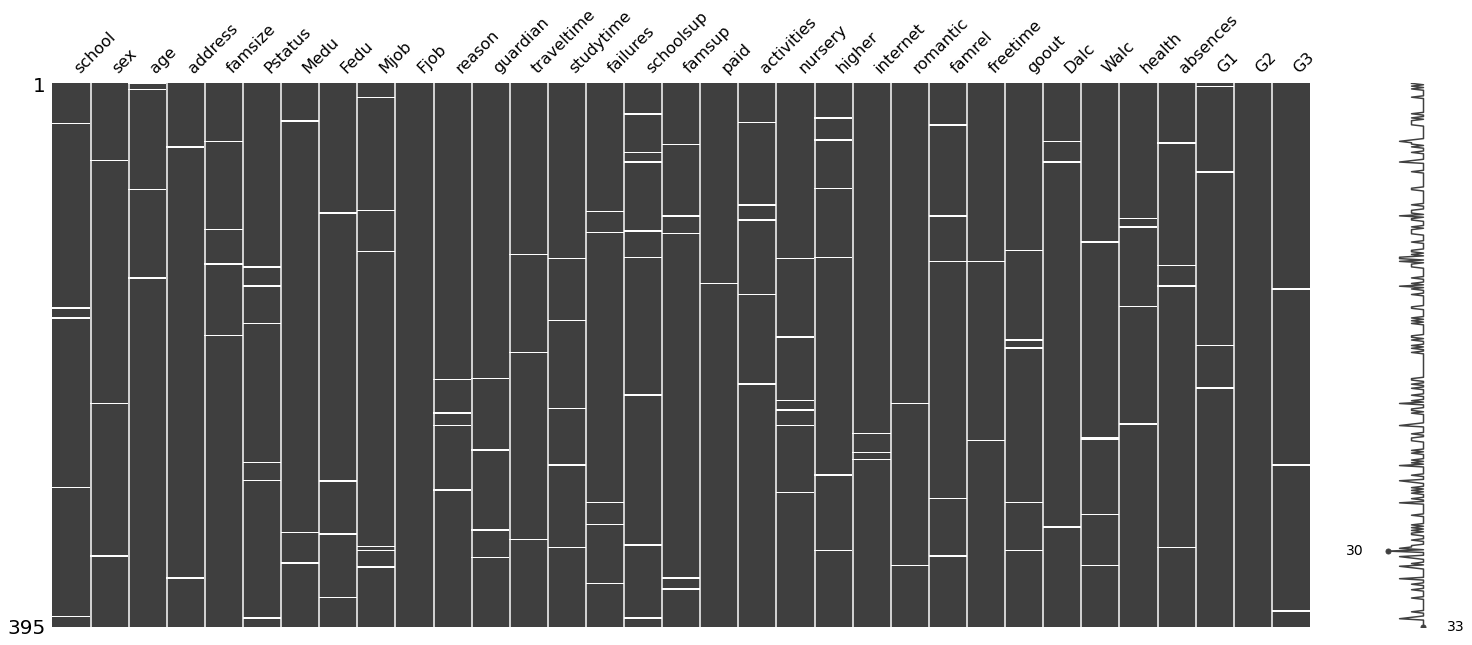

In [5]:
msng.matrix(df.replace(["nulidade","sem validade","zero"],np.nan));

__Comentarios:__ La columna que informa sobre si el estudiante posee apoyo educacional del colegio, contiene 8 datos nulos, siendo la que posee mayor cantidad en nuestro set de datos.

In [6]:
#Transforme los datos perdidos "nulidade","sem validade","zero" a nan para posteriormente eliminarlos
df.replace(["nulidade","sem validade","zero"],np.nan,inplace=True)
df= df.dropna()
print(f"El set sin datos nulos posee {df.shape[0]} observaciones")

El set sin datos nulos posee 284 observaciones


__Comentarios:__ La nueva dimensión del dataframe significa que hubo una reducción de 111 observaciones donde existia algun dato nulo.

In [7]:
#Recodificacion de school
df.rename(columns={"school":"School_MS"}, inplace=True)
df["School_MS"].replace("MS",1,inplace=True)
df["School_MS"].replace("GP",0,inplace=True)

In [8]:
#Recodificacion de sex
df.rename(columns={"sex": "male"}, inplace= True)
df["male"].replace("M",1, inplace=True)
df["male"].replace("F",0, inplace=True)

In [9]:
#Recodificacion de age
fn.str_to_int(df,"age",'"')

In [10]:
#Recodificacion de address
df.rename(columns={"address": "rural_house"}, inplace=True)
df["rural_house"].replace("R",1, inplace= True)
df["rural_house"].replace("U",0, inplace= True)

In [11]:
#Recodificacion de famsize
df.rename(columns={"famsize":"small_fam"}, inplace=True)
df["small_fam"].replace("LE3",1, inplace=True)
df["small_fam"].replace("GT3",0, inplace=True)

In [12]:
#Recodificacion de Pstatus
df.rename(columns= {"Pstatus": "separed_parents"}, inplace=True)
df["separed_parents"].replace("A",1, inplace=True)
df["separed_parents"].replace("T",0, inplace=True)

In [13]:
#Recodificacion de schoolsup
df["schoolsup"].replace("yes",1,inplace=True)
df["schoolsup"].replace("no",0,inplace=True)

In [14]:
#Recodificacion de famsup
df.rename(columns={"famsup":"fam_without_sup"}, inplace=True)
df["fam_without_sup"].replace("yes",0,inplace=True)
df["fam_without_sup"].replace("no",1,inplace=True)

In [15]:
#Recodificacion de paid
df["paid"].replace("yes",1,inplace=True)
df["paid"].replace("no",0,inplace=True)

In [16]:
#Recodificacion de activities
df.rename(columns={"activities":"without_activities"}, inplace=True)
df["without_activities"].replace("yes",0,inplace=True)
df["without_activities"].replace("no",1,inplace=True)

In [17]:
#Recodificacion de nursery
df.rename(columns={"nursery":"no_nursery"}, inplace=True)
df["no_nursery"].replace("yes",0,inplace=True)
df["no_nursery"].replace("no",1,inplace=True)

In [18]:
#Recodificacion de higher
df.rename(columns={"higher":"no_higher"}, inplace=True)
df["no_higher"].replace("yes",0,inplace=True)
df["no_higher"].replace("no",1,inplace=True)

In [19]:
#Recodificacion de internet
df.rename(columns={"internet":"no_internet"}, inplace=True)
df["no_internet"].replace("yes",0,inplace=True)
df["no_internet"].replace("no",1,inplace=True)

In [20]:
#Recodificacion de romantic
df["romantic"].replace("yes",1,inplace=True,regex=True)
df["romantic"].replace("no",0,inplace=True)

In [21]:
#Recodificacion de goout 
fn.str_to_int(df, "goout", '"')

In [22]:
#Recodificacion de health
fn.str_to_int(df,"health",'"')

In [23]:
#Recodificacion de columnas que poseen numeros en formato str a integer
list = ["Medu","Fedu", "traveltime", "studytime", "failures","famrel","freetime","Dalc","Walc","absences","G1","G3"]
for i in list:
    df[i] = df[i].astype(int)

In [24]:
df.Mjob.replace(["other", "services", "teacher", "at_home","health"],[0,1,2,3,4], inplace=True)
df.Fjob.replace(["other", "services", "teacher", "health","at_home"],[0,1,2,3,4], inplace=True)
df.reason.replace(["course","home","reputation","other"],[0,1,2,3], inplace=True)
df.guardian.replace(["mother","father","other"],[0,1,2], inplace=True)

In [25]:
df["G1_approved"] = np.where(df["G1"] < 10,0,1)
df["G2_approved"] = np.where(df["G2"] < 10,0,1)
df["G3_approved"] = np.where(df["G3"] < 10,0,1)

__Comentarios:__  Realizo una nueva agrupación de los atributos que poseen variables categóricas, disminuyendo la cantidad de categorías por cada atributo, posteriormente renombro las variables nominales asignandole un numero a cada categoría.

### __Descripción de la base de datos reestructurada:__
Se debe utilizar el archivo students.csv. Las variables que componen la base son:
* `School_MS`: Informa a cual escuela asiste el estudiante:
    * 0 = Gabriel Pereira
    * 1 = Mousinho da Silveira).
* `male`: Sexo del estudiante.
    * 0 = Mujer
    * 1 = Hombre   
* `age`: Edad del estudiante. (numérica: de 15 a 22).
* `rural_house`: Ubicación de la casa del estudiante:
    * 0 = urbana
    * 1 = rural
* `small_fam`: Tamaño de la familia:
    * 0 = Less or equal to 3
    * 1 = greater than 3
* `separed_parents`: Estado cohabitacional de los padres:
    * 0 = cohabitando juntos
    * 1 = viviendo separados
* `Medu`: Nivel educacional de la madre:
     * 0 = ninguno
     * 1 = educación básica (4to)
     * 2 = de 5to a 9
     * 3 = educación media
     * 4 = educación superior
* `Fedu`: Nivel educacional del padre:
     * 0 = ninguno
     * 1 = educación básica (4to)
     * 2 = de 5to a 9
     * 3 = educación media
     * 4 = educación superior
* `Mjob`: Ocupación de la madre:
    * 0 = other
    * 1 = services
    * 2 = teacher
    * 3 = at_home
    * 4 = health    
* `Fjob`: Ocupación del padre:
    * 0 = other 
    * 1 = services 
    * 2 = teacher 
    * 3 = health
    * 4 = at_home
* `reason`: Razón para escoger la escuela:
    * 0 = course
    * 1 = home
    * 2 = reputation
    * 3 = other
* `guardian`: Apoderado del estudiante:
    * 0 = mother
    * 1 = father
    * 2 = other
* `traveltime`: Tiempo de viaje entre hogar y colegio:
     * 1 = Menos de 15 min,
     * 2 = Entre 15 a 30 min,
     * 3 = Entre 30 min. a 1 hora,
     * 4 = Más de 1 hora).
* `studytime`: Horas semanales dedicadas al estudio. Se debe codificar como:
     * 1 si es menos de 2 horas,
     * 2 si es de 2 a 5 horas,
     * 3 si es de 5 a 10 horas,
     * 4 si es más de 10 horas.
* `failures`: Número de clases reprobadas:
    n si 1<=n<3, de lo contrario 4
* `schoolsup`: Apoyo educacional del colegio:
    * 0 = No posee apoyo
    * 1 = Si posee apoyo
* `fam_without_sup`: Apoyo educacional familiar
    * 0 = Con apoyo familiar
    * 1 = Sin apoyo familiar
* `paid`: Clases particulares pagadas (matemáticas o portugués):
    * 0 = No paga clases particulares
    * 1 = Si paga clases particulares
* `without_activities`: Actividades extracurriculares:
    * 0 = Si asiste a actividades
    * 1 = No asiste a actividades
* `no_nursery`: Asistió a guardería infantil:
    * 0 = Si asistió a guardería
    * 1 = No asistió a guardería
* `no_higher`: Desea proseguir estudios superiores:
    * 0 = Si desea proseguir estudios superiores
    * 1 = No desea proseguir estudios superiores
* `no_internet`: Acceso a internet desde el hogar:
    * 0 = Si posee acceso a internet desde el hogar
    * 1 = No posee acceso a internet desde el hogar
* `romantic`: Relación romántica:
    * 0 = No se encuentra en una relación romántica
    * 1 = Si se encuentra en una relación romántica
* `famrel`: Calidad de las relaciones familiares (numérica: de 1 - muy malas a 5 - excelentes)
* `freetime`: Tiempo libre fuera del colegio (numérica: de 1 - muy poco a 5 - mucho).
* `gooutp`: Salidas con amigos (numérica: de 1 - muy pocas a 5 - muchas).
* `Dalc`: Consumo de alcohol en día de semana (numérica: de 1 - muy bajo a 5 - muy alto).
* `Walc`: Consumo de alcohol en fines de semana (numérica: de 1 - muy bajo a 5 - muy alto).
* `health`: Estado de salud actual (numérica: from 1 - muy malo to 5 - muy bueno).
* `absences`: Cantidad de ausencias escolares (numérica: de 0 a 93).
* `G1`: Notas durante el primer semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo__.
* `G2`: Notas durante el segundo semestre (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo.__
* `G3`: Promedio final (numérica: de 0 a 20). __Este es uno de sus vectores objetivos para el modelo descriptivo y el vector a predecir en el modelo predictivo.__
* `G1_approved`: Informa si el estudiante aprobó el primer semestre (0= No, 1 = Si)
* `G2_approved`: Informa si el estudiante aprobó el segundo semestre (0= No, 1 = Si)
* `G3_approved`: Informa si el estudiante aprobó el año (0= No, 1 = Si)

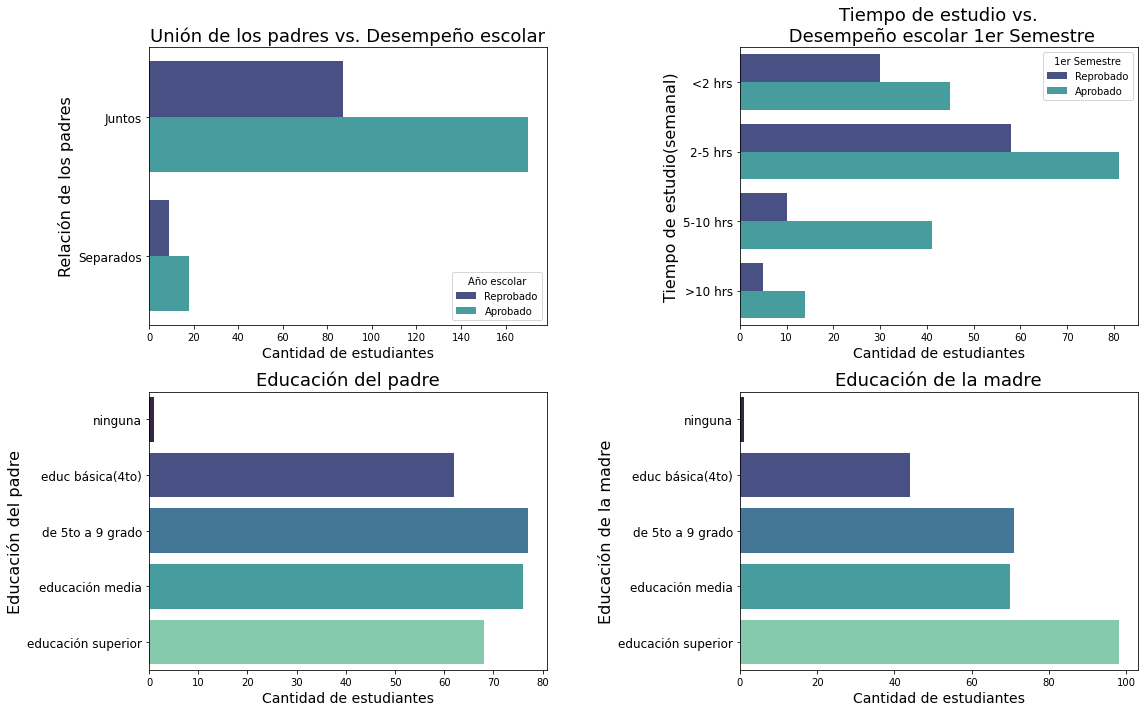

In [26]:
plt.figure(figsize = (16,10))
plt.subplot(2,2,1)
sns.countplot(y= "separed_parents", data = df, hue="G3_approved",palette="mako")
plt.title("Unión de los padres vs. Desempeño escolar", size=18)
plt.ylabel("Relación de los padres", size= 16)
plt.yticks([0,1],["Juntos", "Separados"],size=12)
plt.xlabel("Cantidad de estudiantes", size=14)
plt.yticks(size=12)
plt.legend(labels= ["Reprobado","Aprobado"], loc = "lower right", title= "Año escolar");

plt.subplot(2,2,2)
sns.countplot(y= "studytime", data = df, hue="G1_approved",palette="mako")
plt.title("Tiempo de estudio vs.\n Desempeño escolar 1er Semestre", size=18)
plt.ylabel("Tiempo de estudio(semanal)", size= 16)
plt.yticks([0,1,2,3],["<2 hrs","2-5 hrs","5-10 hrs",">10 hrs"],size=12)
plt.xlabel("Cantidad de estudiantes", size=14)
plt.yticks(size=12)
plt.legend(labels= ["Reprobado","Aprobado"], loc = "best", title= "1er Semestre")

plt.subplot(2,2,3)
sns.countplot(y= "Fedu", data = df,palette="mako")
plt.title("Educación del padre", size=18)
plt.ylabel("Educación del padre", size= 16)
plt.yticks([0,1,2,3,4],["ninguna","educ básica(4to)","de 5to a 9 grado","educación media","educación superior"],size=12)
plt.xlabel("Cantidad de estudiantes", size=14)
plt.yticks(size=12);

plt.subplot(2,2,4)
sns.countplot(y= "Medu", data = df,palette="mako")
plt.title("Educación de la madre", size=18)
plt.ylabel("Educación de la madre", size= 16)
plt.yticks([0,1,2,3,4],["ninguna","educ básica(4to)","de 5to a 9 grado","educación media","educación superior"],size=12)
plt.xlabel("Cantidad de estudiantes", size=14)
plt.yticks(size=12)

plt.tight_layout(w_pad = 5);

__Comentarios:__
* La presencia de ambos padres en la vivienda podria inferir positivamente en el desempeño del estudiante.
* Existe una mayor concentracion de estudiantes que dedican entre 2 y 5 horas semanales al estudio, esto ha traido buenos resultados para gran parte de este grupo, sin embargo otros estudiantes han dedicado menos de dos horas y de igual amnera han aprobado el primer semestre.
* Se observa una tasa mayor de madres que poseen formación universitaria respecto a los padres. En promedio el grado escolar mayor alcanzado por los padres es de 5to a 9no grado de educacion básica.

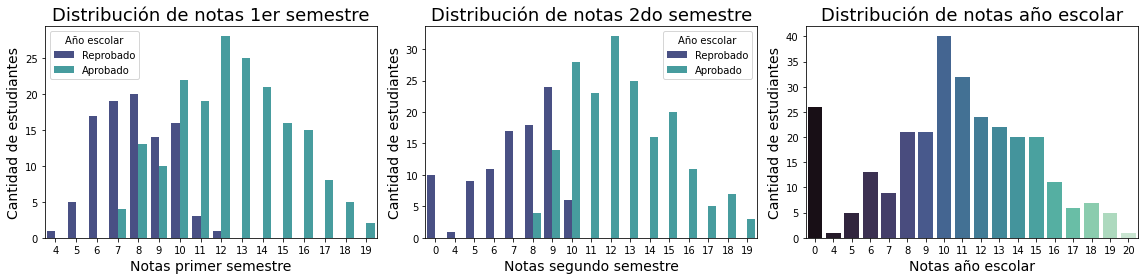

In [27]:
plt.figure(figsize = (16,4))

plt.subplot(1,3,1)
plt.title("Distribución de notas 1er semestre",size=18)
sns.countplot(x=df["G1"],hue=df["G3_approved"], palette="mako")
plt.ylabel("Cantidad de estudiantes", size=14)
plt.xlabel("Notas primer semestre",size=14)
plt.legend(labels= ["Reprobado","Aprobado"], loc = "best", title= "Año escolar")

plt.subplot(1,3,2)
plt.title("Distribución de notas 2do semestre",size=18)
sns.countplot(x=df["G2"],hue=df["G3_approved"],palette="mako")
plt.ylabel("Cantidad de estudiantes", size=14)
plt.xlabel("Notas segundo semestre",size=14)
plt.legend(labels= ["Reprobado","Aprobado"], loc = "best", title= "Año escolar")


plt.subplot(1,3,3)
plt.title("Distribución de notas año escolar",size=18)
sns.countplot(x=df["G3"],palette="mako")
plt.ylabel("Cantidad de estudiantes", size=14)
plt.xlabel("Notas año escolar",size=14)

plt.tight_layout();

__Comentarios:__ Nuestros vectores objetivo serán las columnas que informan la calificación de los estudiantes durante diversos periodos. En el grafico anterior observamos:

* Los estudiantes que reprobaron el año obtuvieron notas inferiores a 13 puntos en el primer semestre e inferiores a 11 puntos en el primer segundo semestre.

* La mayor concentración de individuos estudiados aprobó el año con una calificación de 10 puntos, pocos estudiantes lograron obtener la nota máxima al final del año (20 puntos).

# __Hito 3__: Modelación descriptiva.

In [28]:
modelo_desc_g1_1 = smf.ols("G1 ~ School_MS + male + age + rural_house + small_fam + separed_parents + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + fam_without_sup + paid + without_activities + no_nursery + no_higher + no_internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences",df).fit()
modelo_desc_g1_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     3.449
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           4.09e-08
Time:                        20:11:17   Log-Likelihood:                -691.94
No. Observations:                 284   AIC:                             1446.
Df Residuals:                     253   BIC:                             1559.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5495      3.243      2.636      0.009       2.163      14.936
School_MS             -0.4507      0.644     -0.699      0.485      -1.720       0.818
male                   0.6437      0.431      1.493      0.137      -0.205       1.493
age                    0.0657      0.177      0.371      0.711      -0.283       0.414
rural_house           -0.1483      0.476     -0.311      0.756      -1.086       0.790
small_fam              0.3188      0.434      0.734      0.464      -0.537       1.175
separed_parents        0.1482      0.642      0.231      0.818      -1.116       1.413
Medu                   0.1739      0.236      0.738      0.461      -0.290       0.638
Fedu                   0.2106      0.228      0.923      0.357      -0.239       0.660
Mjob                   0.1663      0.142      1.168      0.244      -0.114       0.447
Fjob                   0.4095      0.189      2.167      0.031       0.037       0.782
reason                 0.2268      0.185      1.229      0.220      -0.137       0.590
guardian               0.0260      0.320      0.081      0.935      -0.603       0.655
traveltime            -0.0043      0.288     -0.015      0.988      -0.572       0.564
studytime              0.4476      0.240      1.867      0.063      -0.025       0.920
failures              -1.0064      0.277     -3.627      0.000      -1.553      -0.460
schoolsup             -1.7657      0.562     -3.143      0.002      -2.872      -0.659
fam_without_sup        0.8773      0.411      2.132      0.034       0.067       1.687
paid                  -0.1661      0.399     -0.416      0.678      -0.952       0.620
without_activities     0.4784      0.365      1.311      0.191      -0.240       1.197
no_nursery             0.0342      0.453      0.076      0.940      -0.859       0.927
no_higher             -1.2837      0.862     -1.489      0.138      -2.982       0.415
no_internet           -0.0434      0.493     -0.088      0.930      -1.014       0.927
romantic              -0.0474      0.396     -0.120      0.905      -0.828       0.733
famrel                 0.1179      0.210      0.562      0.575      -0.295       0.531
freetime               0.3238      0.190      1.705      0.089      -0.050       0.698
goout                 -0.7003      0.198     -3.535      0.000      -1.090      -0.310
Dalc                  -0.1375      0.281     -0.489      0.625      -0.691       0.416
Walc                   0.1431      0.210      0.683      0.495      -0.270       0.556
health                -0.2755      0.139     -1.986      0.048      -0.549      -0.002
absences              -0.0046      0.024     -0.195      0.846      -0.051       0.042
==============================================================================
Omnibus:                        7.008   Durbin

In [29]:
modelo_desc_g1_2 = smf.ols("G1 ~ failures + schoolsup + goout", df).fit()
modelo_desc_g1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     21.11
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.35e-12
Time:                        20:11:17   Log-Likelihood:                -711.67
No. Observations:                 284   AIC:                             1431.
Df Residuals:                     280   BIC:                             1446.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4322      0.547     24.556      0.000      12.355      14.509
failures      -1.3342      0.246     -5.417      0.000      -1.819      -0.849
schoolsup     -2.0681      0.521     -3.968      0.000      -3.094      -1.042
goout         -0.5758      0.167     -3.439      0.001      -0.905      -0.246
==============================================================================
Omnibus:                        6.521   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                4.998
Skew:                           0.214   Prob(JB):                       0.0821
Kurtosis:                       2.510   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
modelo_desc_g2_1 = smf.ols("G2 ~ School_MS + male + age + rural_house + small_fam + separed_parents + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + fam_without_sup + paid + without_activities + no_nursery + no_higher + no_internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + G1",df).fit()
modelo_desc_g2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     27.56
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           5.45e-64
Time:                        20:11:17   Log-Likelihood:                -570.74
No. Observations:                 284   AIC:                             1205.
Df Residuals:                     252   BIC:                             1322.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.3087      2.149      2.470      0.014       1.075       9.542
School_MS              0.7898      0.422      1.872      0.062      -0.041       1.620
male                   0.1643      0.283      0.580      0.562      -0.393       0.722
age                   -0.1965      0.116     -1.698      0.091      -0.424       0.031
rural_house           -0.8030      0.312     -2.578      0.011      -1.417      -0.190
small_fam              0.1168      0.284      0.411      0.682      -0.443       0.677
separed_parents        0.3783      0.420      0.901      0.368      -0.449       1.205
Medu                   0.1386      0.154      0.899      0.370      -0.165       0.442
Fedu                  -0.2728      0.150     -1.824      0.069      -0.567       0.022
Mjob                  -0.0511      0.093     -0.547      0.585      -0.235       0.133
Fjob                  -0.1463      0.125     -1.173      0.242      -0.392       0.099
reason                 0.1766      0.121      1.459      0.146      -0.062       0.415
guardian               0.1160      0.209      0.555      0.580      -0.296       0.528
traveltime            -0.2435      0.189     -1.291      0.198      -0.615       0.128
studytime             -0.0545      0.158     -0.345      0.730      -0.365       0.256
failures              -0.0537      0.186     -0.289      0.773      -0.420       0.313
schoolsup              0.6900      0.374      1.843      0.067      -0.048       1.428
fam_without_sup        0.0866      0.271      0.319      0.750      -0.448       0.621
paid                   0.4220      0.261      1.617      0.107      -0.092       0.936
without_activities    -0.2784      0.239     -1.163      0.246      -0.750       0.193
no_nursery            -0.1592      0.296     -0.537      0.592      -0.743       0.425
no_higher              0.1167      0.566      0.206      0.837      -0.999       1.232
no_internet           -0.4006      0.322     -1.244      0.215      -1.035       0.234
romantic              -0.6190      0.259     -2.389      0.018      -1.129      -0.109
famrel                -0.0813      0.137     -0.592      0.554      -0.352       0.189
freetime              -0.0586      0.125     -0.469      0.639      -0.305       0.187
goout                 -0.2110      0.133     -1.590      0.113      -0.472       0.050
Dalc                  -0.0963      0.184     -0.524      0.601      -0.459       0.266
Walc                   0.2197      0.137      1.602      0.111      -0.050       0.490
health                -0.0926      0.091     -1.013      0.312      -0.273       0.087
absences              -0.0030      0.016     -0.195      0.846      -0.034       0.028
G1                     0.9681      0.041     23.547      0.000       0.887       1.049
======================================

In [31]:
modelo_desc_g2_2 = smf.ols("G2 ~ rural_house + romantic + G1",df).fit()
modelo_desc_g2_2.summary().tables[0]

Dep. Variable:,G2,R-squared:,0.738
Model:,OLS,Adj. R-squared:,0.735
Method:,Least Squares,F-statistic:,262.9
Date:,"Wed, 06 Apr 2022",Prob (F-statistic):,4.22e-81
Time:,20:11:18,Log-Likelihood:,-590.62
No. Observations:,284,AIC:,1189.
Df Residuals:,280,BIC:,1204.
Df Model:,3,,
Covariance Type:,nonrobust,,


In [32]:
modelo_desc_g3_1 = smf.ols("G3 ~ School_MS + male + age + rural_house + small_fam + separed_parents + Medu + Fedu + Mjob + Fjob + reason + guardian + traveltime + studytime + failures + schoolsup + fam_without_sup + paid + without_activities + no_nursery + no_higher + no_internet + romantic + famrel + freetime + goout + Dalc + Walc + health + absences + G1 + G2",df).fit()
modelo_desc_g3_1.summary().tables[0]

Dep. Variable:,G3,R-squared:,0.851
Model:,OLS,Adj. R-squared:,0.832
Method:,Least Squares,F-statistic:,44.68
Date:,"Wed, 06 Apr 2022",Prob (F-statistic):,1.19e-85
Time:,20:11:18,Log-Likelihood:,-563.74
No. Observations:,284,AIC:,1193.
Df Residuals:,251,BIC:,1314.
Df Model:,32,,
Covariance Type:,nonrobust,,


In [33]:
modelo_desc_g3_2 = smf.ols("G3 ~ famrel + Walc + absences + G1 + G2", df).fit()
modelo_desc_g3_2.summary().tables[0]

Dep. Variable:,G3,R-squared:,0.832
Model:,OLS,Adj. R-squared:,0.829
Method:,Least Squares,F-statistic:,274.6
Date:,"Wed, 06 Apr 2022",Prob (F-statistic):,2.74e-105
Time:,20:11:18,Log-Likelihood:,-580.80
No. Observations:,284,AIC:,1174.
Df Residuals:,278,BIC:,1195.
Df Model:,5,,
Covariance Type:,nonrobust,,


In [34]:
modelo_desc_g3_3 = smf.ols("G3 ~ famrel +  absences + G1 + G2", df).fit()
modelo_desc_g3_3.summary().tables[0]

Dep. Variable:,G3,R-squared:,0.830
Model:,OLS,Adj. R-squared:,0.827
Method:,Least Squares,F-statistic:,339.7
Date:,"Wed, 06 Apr 2022",Prob (F-statistic):,6.92e-106
Time:,20:11:18,Log-Likelihood:,-582.44
No. Observations:,284,AIC:,1175.
Df Residuals:,279,BIC:,1193.
Df Model:,4,,
Covariance Type:,nonrobust,,


# __Hito 4__: Modelación predictiva.

__Comentarios:__ 
* Durante la etapa de prepocesamiento se realizó una inspección del set de datos, identificando la cantidad de columnas y tipos de variables en cada una. Posteriormente evaluamos la presencia de datos nulos o mal ingresados, los cuales fueron eliminados para no afectar el modelo con datos que no aportan información.

* Realizamos una nueva agrupación de los atributos con variables categóricas, disminuyendo la cantidad de categorías por cada atributo, posteriormente se creó una columna para cada categoría creada con el fin de binarizarlas. Este proceso es importante ya que los modelos no son capaces de interpretar variables de tipo texto.

* Se estandarizaran las matrices tanto la de entrenamiento como la de prueba, para facilitar el análisis de nuestros datos y con esto el set de datos se encuentra en condiciones para iniciar la modelación.

In [35]:
X = df.loc[:,["famrel","absences","G1","G2"]]
y = df["G3"]

X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=12345)

scaler = StandardScaler()

In [36]:
modelo_pred_1 = LinearRegression().fit(X_train, y_train)

y_hat = modelo_pred_1.predict(X_test)

In [37]:
print(f"El promedio de error cuadrado para el modelo es de", round(mean_squared_error(y_test,y_hat),2))

El promedio de error cuadrado para el modelo es de 3.67


In [38]:
print(f"El promedio de ajuste de los datos en el modelo es de", round(r2_score(y_test, y_hat),2))

El promedio de ajuste de los datos en el modelo es de 0.83


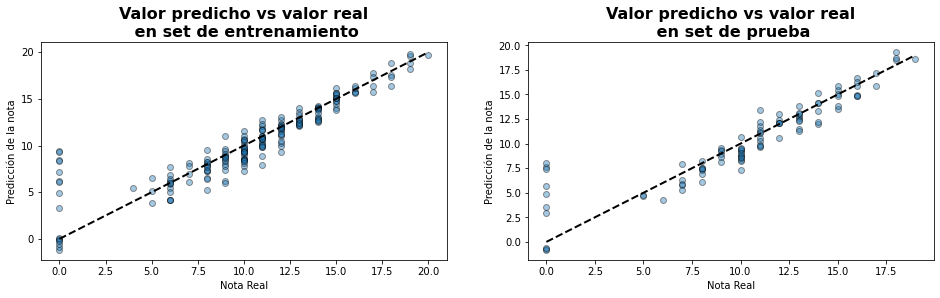

In [39]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)
prediccion_train = modelo_pred_1.predict(X_train)
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real\n en set de entrenamiento', fontsize = 16, fontweight = "bold")
plt.ylabel("Predicción de la nota")
plt.xlabel("Nota Real")

plt.subplot(1,2,2)
plt.scatter(y_test, y_hat, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real\n en set de prueba', fontsize = 16, fontweight = "bold")
plt.ylabel("Predicción de la nota")
plt.xlabel("Nota Real");